# Data Processing 

## Network analysis

In [18]:
import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
import ijson
import datetime
%matplotlib inline

In [2]:
edge_list_tag_path = os.path.join("Tags")

In [4]:
#for the_file in os.listdir(edge_list_tag_path):
#    if not "_list" in the_file:
#        continue
#    if not the_file == "javascript_ordered_list.json":
#        continue
#    list_path = os.path.join(edge_list_tag_path, the_file)
#    with open(list_path,'r') as e:
js_network = nx.read_edgelist(os.path.join("Tags", "javascript_ordered_list.txt"),nodetype=int, data=(('time',str),('votes', int))) 

In [5]:
nx.number_connected_components(js_network)

36140

In [5]:
js_network.number_of_selfloops ()

52750

In [7]:
np.asarray(list(js_network.degree(js_network.nodes()).values())).mean()

3.6703457896212779

(array([  4.17112000e+05,   7.70000000e+01,   1.20000000e+01,
          8.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  1.00000000e+00,   3.60000000e+02,   7.19000000e+02,
          1.07800000e+03,   1.43700000e+03,   1.79600000e+03,
          2.15500000e+03,   2.51400000e+03,   2.87300000e+03,
          3.23200000e+03,   3.59100000e+03]),
 <a list of 10 Patch objects>)

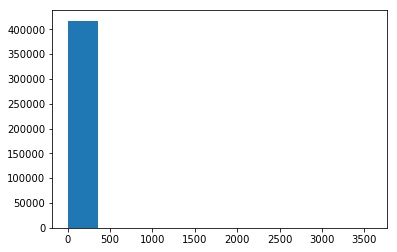

In [42]:
degrees_dict = js_network.degree()
degrees = np.asarray([ [key,degrees_dict[key]] for key in degrees_dict])
plt.hist(degrees[:,1])

In [66]:
degrees_unique = np.unique(degrees[:,1])
degrees_num, tmp = np.histogram(degrees, bins=degrees_unique.shape[0])

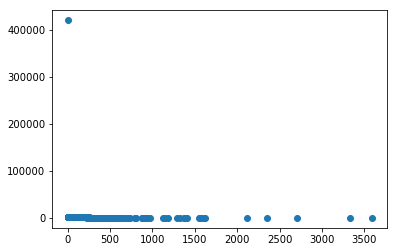

In [67]:
plt.scatter(degrees_unique, degrees_num)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30
   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60
   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75
   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90
   91   92   93   94   95   96   97   98   99  100  101  102  103  104  105
  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120
  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135
  136  137  138  139  140  141  142  143  144  145  146  148  149  150  151
  152  153  154  155  156  157  158  159  160  161  162  163  165  166  167
  168  169  170  171  173  174  175  176  179  180  181  182  183  184  185
  186  187  188  189  190  191  192  193  194  196  197  198  200  201  202
  203  204  

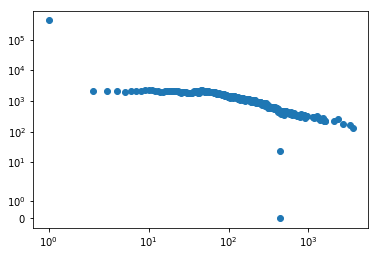

In [105]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(degrees_unique, degrees_num)
ax.set_yscale('symlog')
ax.set_xscale('symlog')
print (degrees_unique)
print (degrees_num)

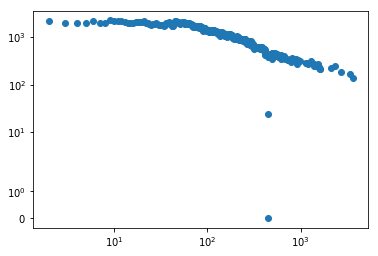

In [87]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(degrees_unique[1:], degrees_num[1:])
ax.set_yscale('symlog')
ax.set_xscale('symlog')

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30
   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60
   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75
   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90
   91   92   93   94   95   96   97   98   99  100  101  102  103  104  105
  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120
  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135
  136  137  138  139  140  141  142  143  144  145  146  148  149  150  151
  152  153  154  155  156  157  158  159  160  161  162  163  165  166  167
  168  169  170  171  173  174  175  176  179  180  181  182  183  184  185
  186  187  188  189  190  191  192  193  194  196  197  198  200  201  202
  203  204  

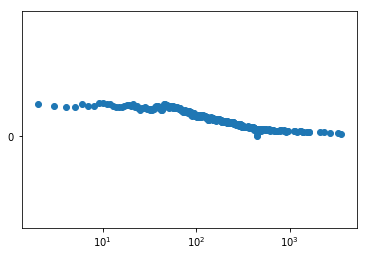

In [106]:
fig = plt.figure()
ax = plt.gca()
ax.scatter(degrees_unique[1:], degrees_num[1:]/ degrees_num[:1].sum())
ax.set_yscale('symlog')
ax.set_xscale('symlog')

print (degrees_unique)
print (degrees_num[1:]/ degrees_num[:1].sum())

In [14]:
nx.average_clustering(js_network)

0.0014143541943343108

In [15]:
comps = nx.connected_component_subgraphs(js_network)

In [16]:
max_comp = max(comps, key=len)
len(max_comp.nodes())

357624

In [ ]:
nx.diameter(max_comp)

(array([  3.57517000e+05,   7.70000000e+01,   1.20000000e+01,
          8.00000000e+00,   5.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  1.00000000e+00,   3.60000000e+02,   7.19000000e+02,
          1.07800000e+03,   1.43700000e+03,   1.79600000e+03,
          2.15500000e+03,   2.51400000e+03,   2.87300000e+03,
          3.23200000e+03,   3.59100000e+03]),
 <a list of 10 Patch objects>)

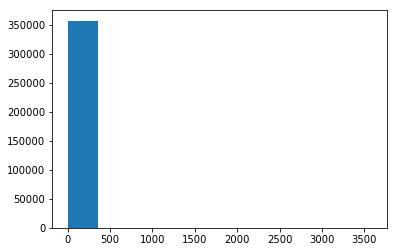

In [48]:
max_degrees_dict = max_comp.degree()
max_degrees = np.asarray([ [key,max_degrees_dict[key]] for key in max_degrees_dict])
plt.hist(max_degrees[:,1])

(array([   3909.,   13997.,   30264.,   56087.,   78004.,   99953.,
         115933.,  119310.,  125317.,  122895.]),
 array([ 733259.18636554,  733590.08560206,  733920.98483857,
         734251.88407508,  734582.78331159,  734913.68254811,
         735244.58178462,  735575.48102113,  735906.38025765,
         736237.27949416,  736568.17873067]),
 <a list of 10 Patch objects>)

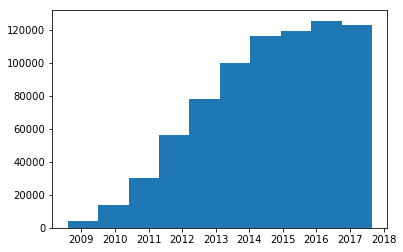

In [21]:
times_dict = nx.get_edge_attributes(js_network,'time')
times = [datetime.datetime.strptime(val,"%Y-%m-%dT%H:%M:%S.%f") for key,val in times_dict.items()]
plt.hist(times)

In [104]:
STEPS = 20
networks = []
with open(os.path.join("Tags", "javascript_ordered_list.json"), 'rb') as f:
    lines = f.readlines()
    for i in range(STEPS):
        end = int(len(lines)*i/STEPS)
        print (lines[end])
        networks.append(nx.read_edgelist(lines[:end], nodetype=int, data=(('time',str),)))
[len(n.nodes()) for n in networks]

b'242 275 2008-08-05T04:28:21.983\r\n'
b'570483 85882 2011-02-02T00:41:25.400\r\n'
b'1004278 904428 2011-10-21T08:04:03.093\r\n'
b'1177441 1381613 2012-05-08T09:00:39.127\r\n'
b'1752849 721236 2012-10-17T14:24:22.690\r\n'
b'1866810 1165998 2013-03-16T14:12:34.997\r\n'
b'859154 2225682 2013-07-31T07:34:26.843\r\n'
b'958596 1339987 2013-11-26T03:42:49.610\r\n'
b'905376 182365 2014-03-10T15:07:36.963\r\n'
b'3758172 16363 2014-06-24T20:14:36.373\r\n'
b'1692715 544439 2014-10-17T20:00:46.097\r\n'
b'697360 978320 2015-02-16T06:54:11.440\r\n'
b'3166497 1785164 2015-05-31T21:23:58.293\r\n'
b'390278 1348195 2015-09-07T07:13:05.803\r\n'
b'569976 1588897 2015-12-19T00:11:11.190\r\n'
b'2169274 1801452 2016-03-28T22:58:11.980\r\n'
b'668499 2117911 2016-07-05T21:17:16.987\r\n'
b'3624801 2806996 2016-10-19T19:12:17.753\r\n'
b'7227057 5763993 2017-02-05T22:26:55.913\r\n'
b'7130878 1593024 2017-05-16T03:35:13.880\r\n'


[0,
 25787,
 46685,
 67142,
 87180,
 107713,
 129444,
 150657,
 171365,
 191943,
 212925,
 234235,
 255289,
 275304,
 294926,
 315199,
 335605,
 355842,
 375821,
 396373]

(array([  7.65573000e+05,   8.20000000e+01,   9.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  -18. ,   137.6,   293.2,   448.8,   604.4,   760. ,   915.6,
         1071.2,  1226.8,  1382.4,  1538. ]),
 <a list of 10 Patch objects>)

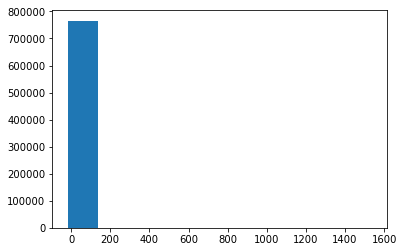

In [15]:
votes_dict = nx.get_edge_attributes(js_network,'votes')
votes = [val for key,val in votes_dict.items()]
plt.hist(votes)